# Simple Baseball Data Exploration

###### In Progress

This is one of the first files I started working on simply to play around with data I could access using the webscraper I wrote for baseball-reference.com, which is bbref_scraper.py. This began as just a way for me to try and look at data from MLB Awards such as the Cy Young. It turned into just some simple visualizations and exploration into Clayton Kershaw's season data. I plan to come back to this data and continue looking into Awards data and take a deeper dive into the evolution of Clayton Kershaw's career.

In [46]:
import bbref_scraper as bbr, numpy as np, pandas as pd, sklearn.preprocessing as pre
import matplotlib.pyplot as plt

### The next few cells look at Cy Young Award's History

First off is a table showing the standard deviation and the mean of each stat given by Baseball Reference. In the future I plan to add WHIP as a category, as Baseball Reference doesn't include the stat in their Cy Young table.

In [47]:
cy = bbr.cyHist()
cats = ['WAR', 'W', 'L', 'SV', 'ERA', 'IP', 'SO']
stats = [cy[cat].astype(float) for cat in cats]

In [48]:
stats_arr = np.asarray(stats)
dist = []
avg = []
for stat in stats:
    dist.append(np.std(stat))
    avg.append(np.mean(stat))
stat_results = pd.DataFrame(data=[dist, avg], columns=cats, index=["Std Dev", "Mean"])
stat_results

,WAR,W,L,SV,ERA,IP,SO
Std Dev,2.372445,4.985219,2.889371,10.275356,0.525271,54.350376,67.796203
Mean,7.022034,19.940678,7.203390,2.957627,2.480932,244.011864,213.745763


In [49]:
norm_std = pre.normalize([dist])

The next couple cells just plot ERA vs WAR, as I wanted to see the relationship between the two. There's also plots of WAR, Wins, Losses, and ERA for both the National and American Leagues over time.

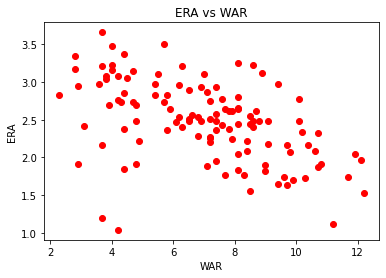

In [50]:
plt.scatter(stats[0], stats[4], c='red')
plt.xlabel("WAR")
plt.ylabel("ERA")
plt.title("ERA vs WAR")
plt.show()

In [51]:
# Plan to look more at deGrom's stats from 18-19 seasons

deGrom18 = cy.loc[3][cats].astype(float).to_numpy()
np.mean(pre.normalize([deGrom18 - avg]))

0.043993843165130095

In [69]:
nl = cy.loc[cy['Lg'] == 'NL']
al = cy.loc[cy['Lg'] == 'AL']
years = np.asarray(nl['Year'].astype(int))
al_years = np.asarray(al['Year'].astype(int))
nl_war = np.asarray(nl['WAR'].astype(float))
al_war = np.asarray(al['WAR'].astype(float))
nl_wins = np.asarray(nl['W'].astype(int))
al_wins = np.asarray(al['W'].astype(int))
nl_loss = np.asarray(nl['L'].astype(int))
al_loss = np.asarray(al['L'].astype(int))
nl_era = np.asarray(nl['ERA'].astype(float))
al_era = np.asarray(al['ERA'].astype(float))

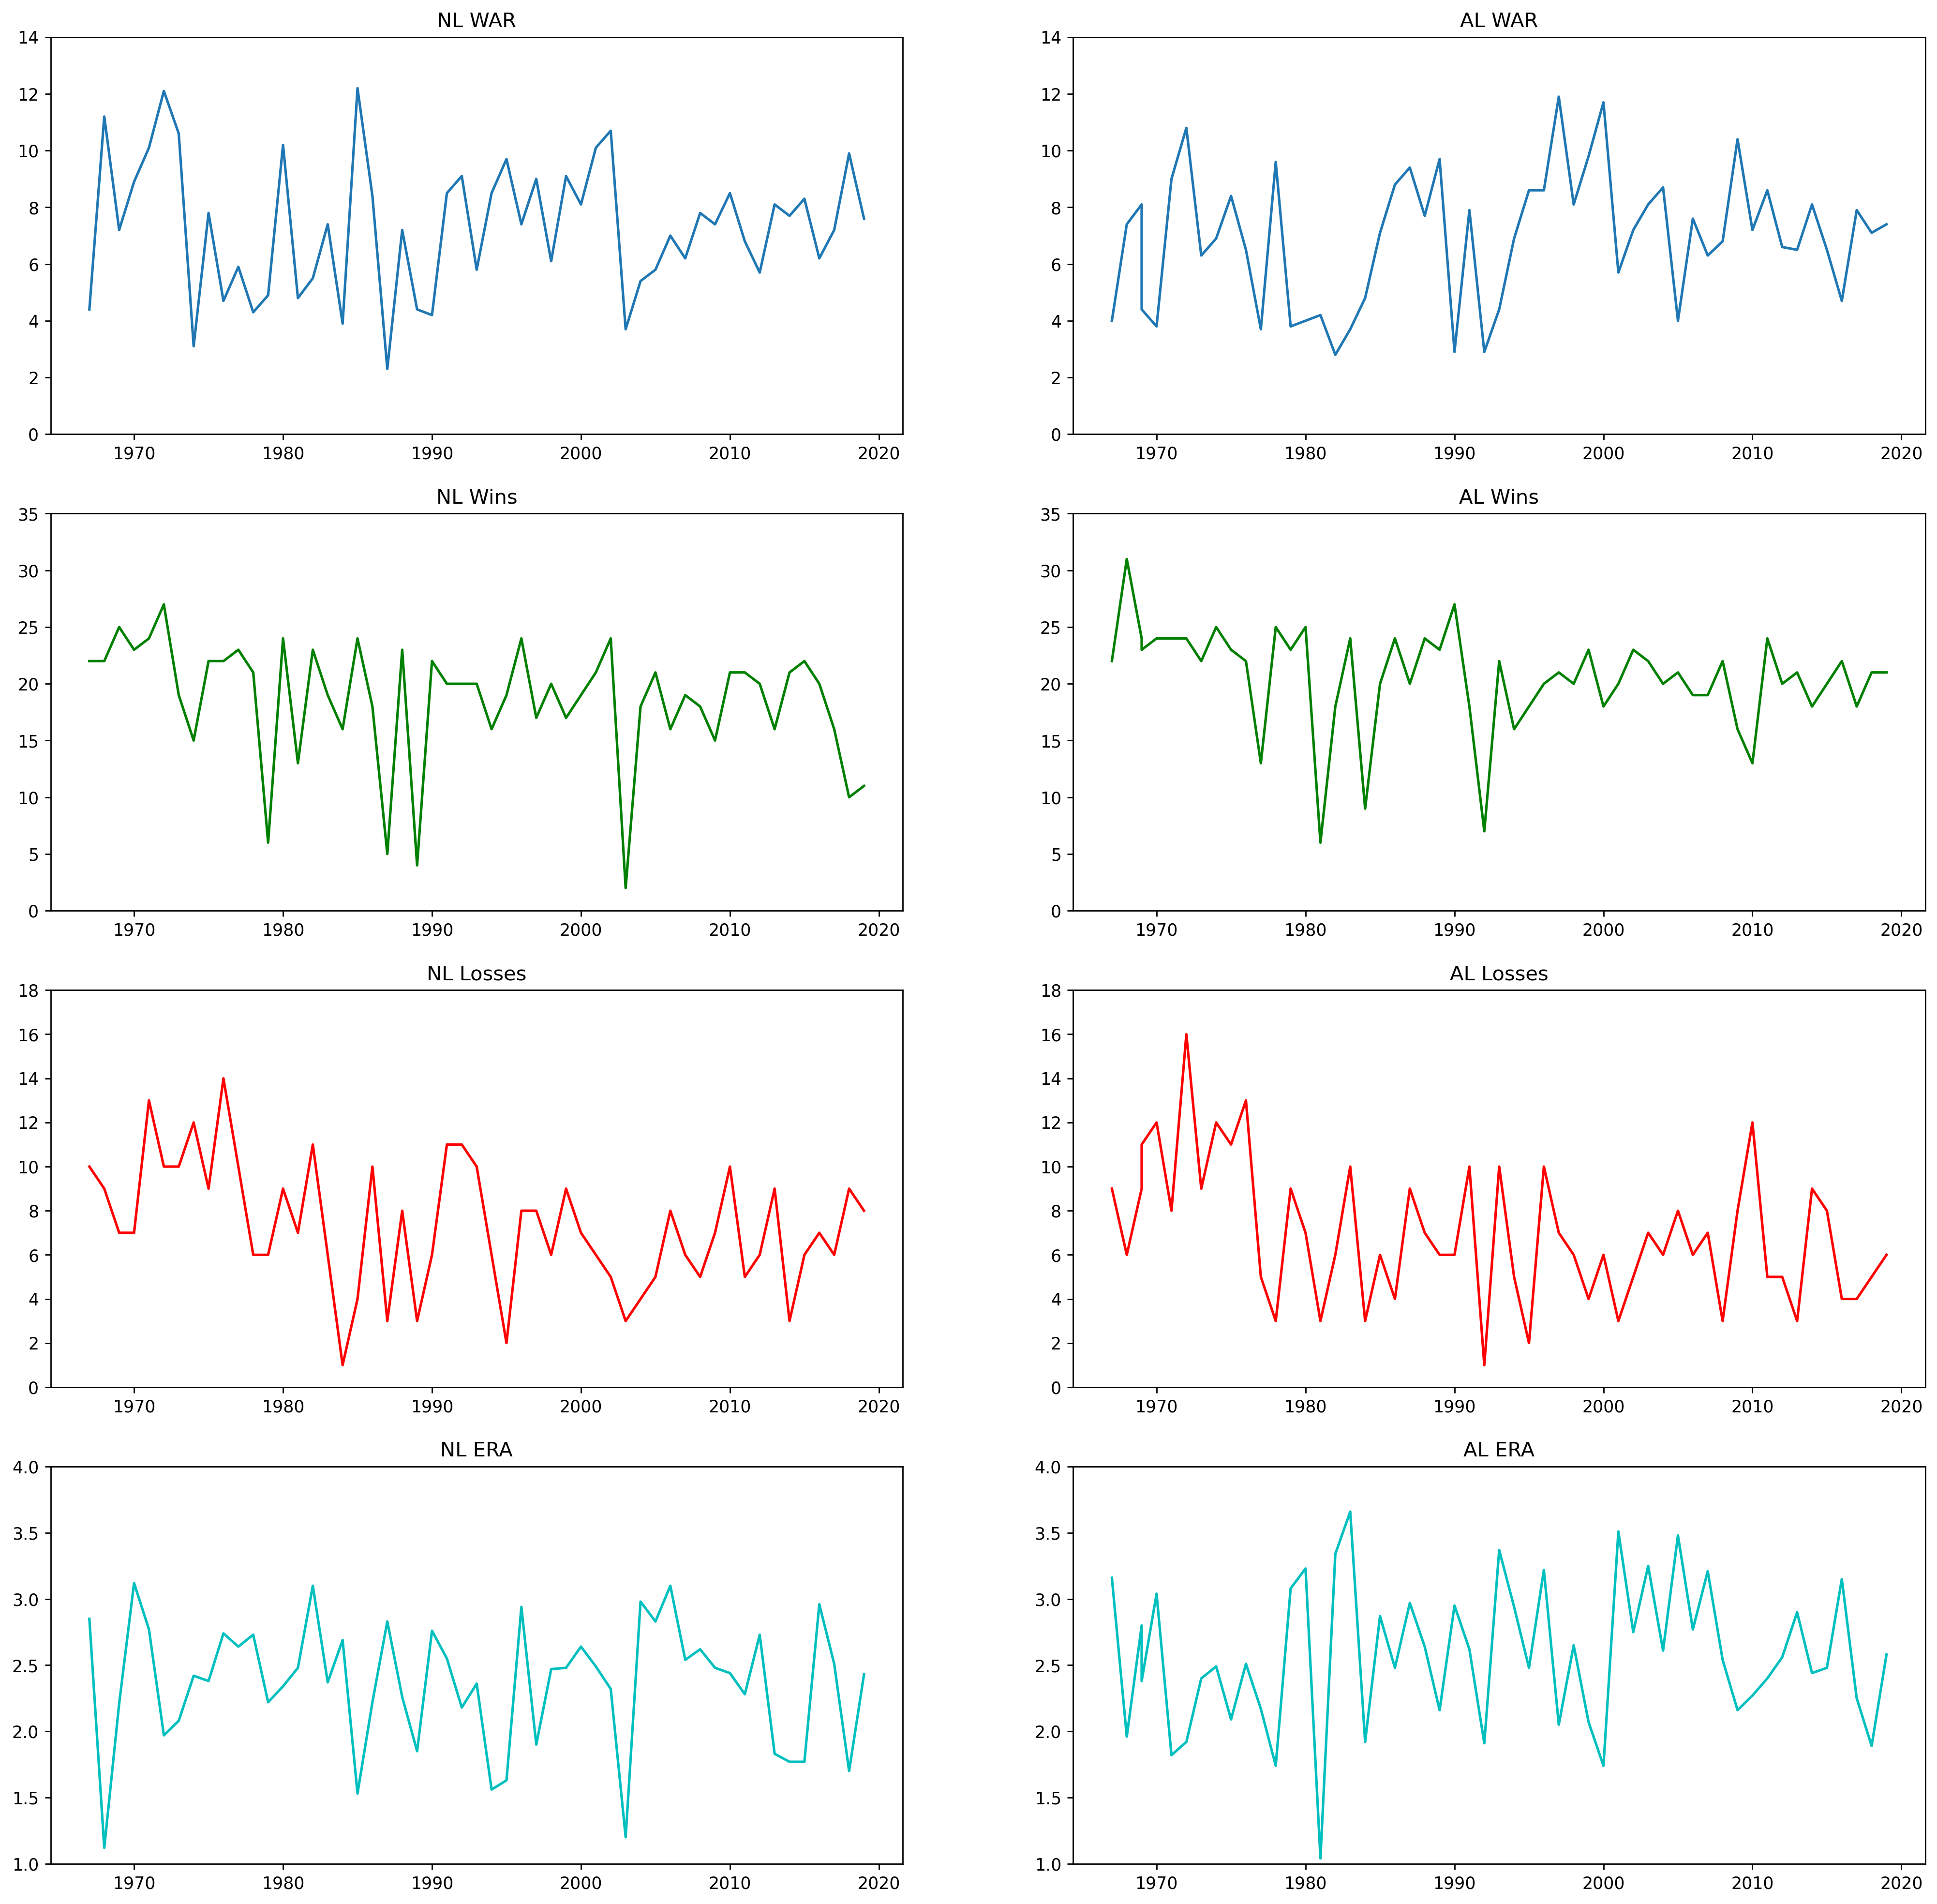

In [72]:
fig, axs = plt.subplots(4, 2)
axs[0, 0].plot(years, nl_war)
axs[0, 0].set_title('NL WAR')
axs[0, 0].set_ylim(0, 14)
axs[0, 1].plot(al_years, al_war)
axs[0, 1].set_title('AL WAR')
axs[0, 1].set_ylim(0, 14)
axs[1, 0].plot(years, nl_wins, c = 'g')
axs[1, 0].set_title('NL Wins')
axs[1, 0].set_ylim(0, 35)
axs[1, 1].plot(al_years, al_wins, c = 'g')
axs[1, 1].set_title('AL Wins')
axs[1, 1].set_ylim(0, 35)
axs[2, 0].plot(years, nl_loss, c = 'r')
axs[2, 0].set_title('NL Losses')
axs[2, 0].set_ylim(0, 18)
axs[2, 1].plot(al_years, al_loss, c = 'r')
axs[2, 1].set_title('AL Losses')
axs[2, 1].set_ylim(0, 18)
axs[3, 0].plot(years, nl_era, c = 'c')
axs[3, 0].set_title('NL ERA')
axs[3, 0].set_ylim(1, 4)
axs[3, 1].plot(al_years, al_era, c = 'c')
axs[3, 1].set_title('AL ERA')
axs[3, 1].set_ylim(1, 4)
# fig.tight_layout()
fig.set_size_inches(20,20)
fig.dpi = 250
plt.show()

### Looking at Clayton Kershaw's stats

The next section focuses on Kershaw's stats for his career.

In [54]:
kershaw = bbr.getPlayerStats('kershcl01')
kershaw14 = bbr.getPlayerGameLog('kershcl01', 2014)

In [55]:
# Get # of wins at time of each appearance. Returns list in the form of [0, 1, 1, 2, 3, 4, 4...]
def getWins(log):
    dec = np.asarray(log['Dec'].astype(str))
    wins = []
    for d in dec:
        if not d:
            if not wins: 
                wins.append(0)
            else:
                wins.append(wins[-1])
            continue
        elif any(elem in d for elem in ['W', 'L']):
            start = d.find('(') + 1
            end = d.find('-')
            wins.append(d[start:end])
        else:
            wins.append(wins[-1])
    return wins

# Get # of losses at time of each appearance. Returns list in the form of [0, 1, 1, 2, 3, 4, 4...]
def getLosses(log):
    dec = np.asarray(log['Dec'].astype(str))
    losses = []
    for d in dec:
        if not d:
            if not losses: 
                losses.append(0)
            else:
                losses.append(losses[-1])
            continue
        elif any(elem in d for elem in ['W', 'L']):
            start = d.find('-') + 1
            end = d.find(')')
            losses.append(d[start:end])
        else:
            losses.append(losses[-1])
    return losses

# Get game numbers for each win. Returns list in form of [1, 15, 55, 89...]
def getWinGames(log):
    dec = np.asarray(log['Dec'].astype(str))
    gtm = np.asarray(log['Gtm'].astype(int))
    wins = []
    game = []
    for d,g in zip(dec, gtm):
        if d and d[0] == 'W':
            start = d.find('(') + 1
            end = d.find('-')
            wins.append(int(d[start:end]))
            game.append(g)
    return game, wins

The next cell plot Kershaw's wins against his appearances for the 2014 season.

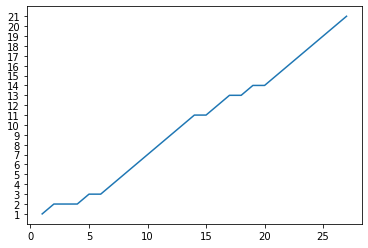

In [56]:
games = np.asarray(kershaw14['Rk'].astype(int))
plt.plot(games, getWins(kershaw14))
plt.show()

In [57]:
player_id = bbr.getPlayerID("Clayton", "Kershaw")
years = bbr.getCareerYears(player_id)
logs = []
for year in years:
    if year == 2020: continue
    logs.append(bbr.getPlayerGameLog(player_id, year))

Next up is a plot of Kershaw's wins and losses against each of his appearances for each season of his career. Mainly used this to get an idea of Kershaw's trend of wins/losses, not really to compare season by season.

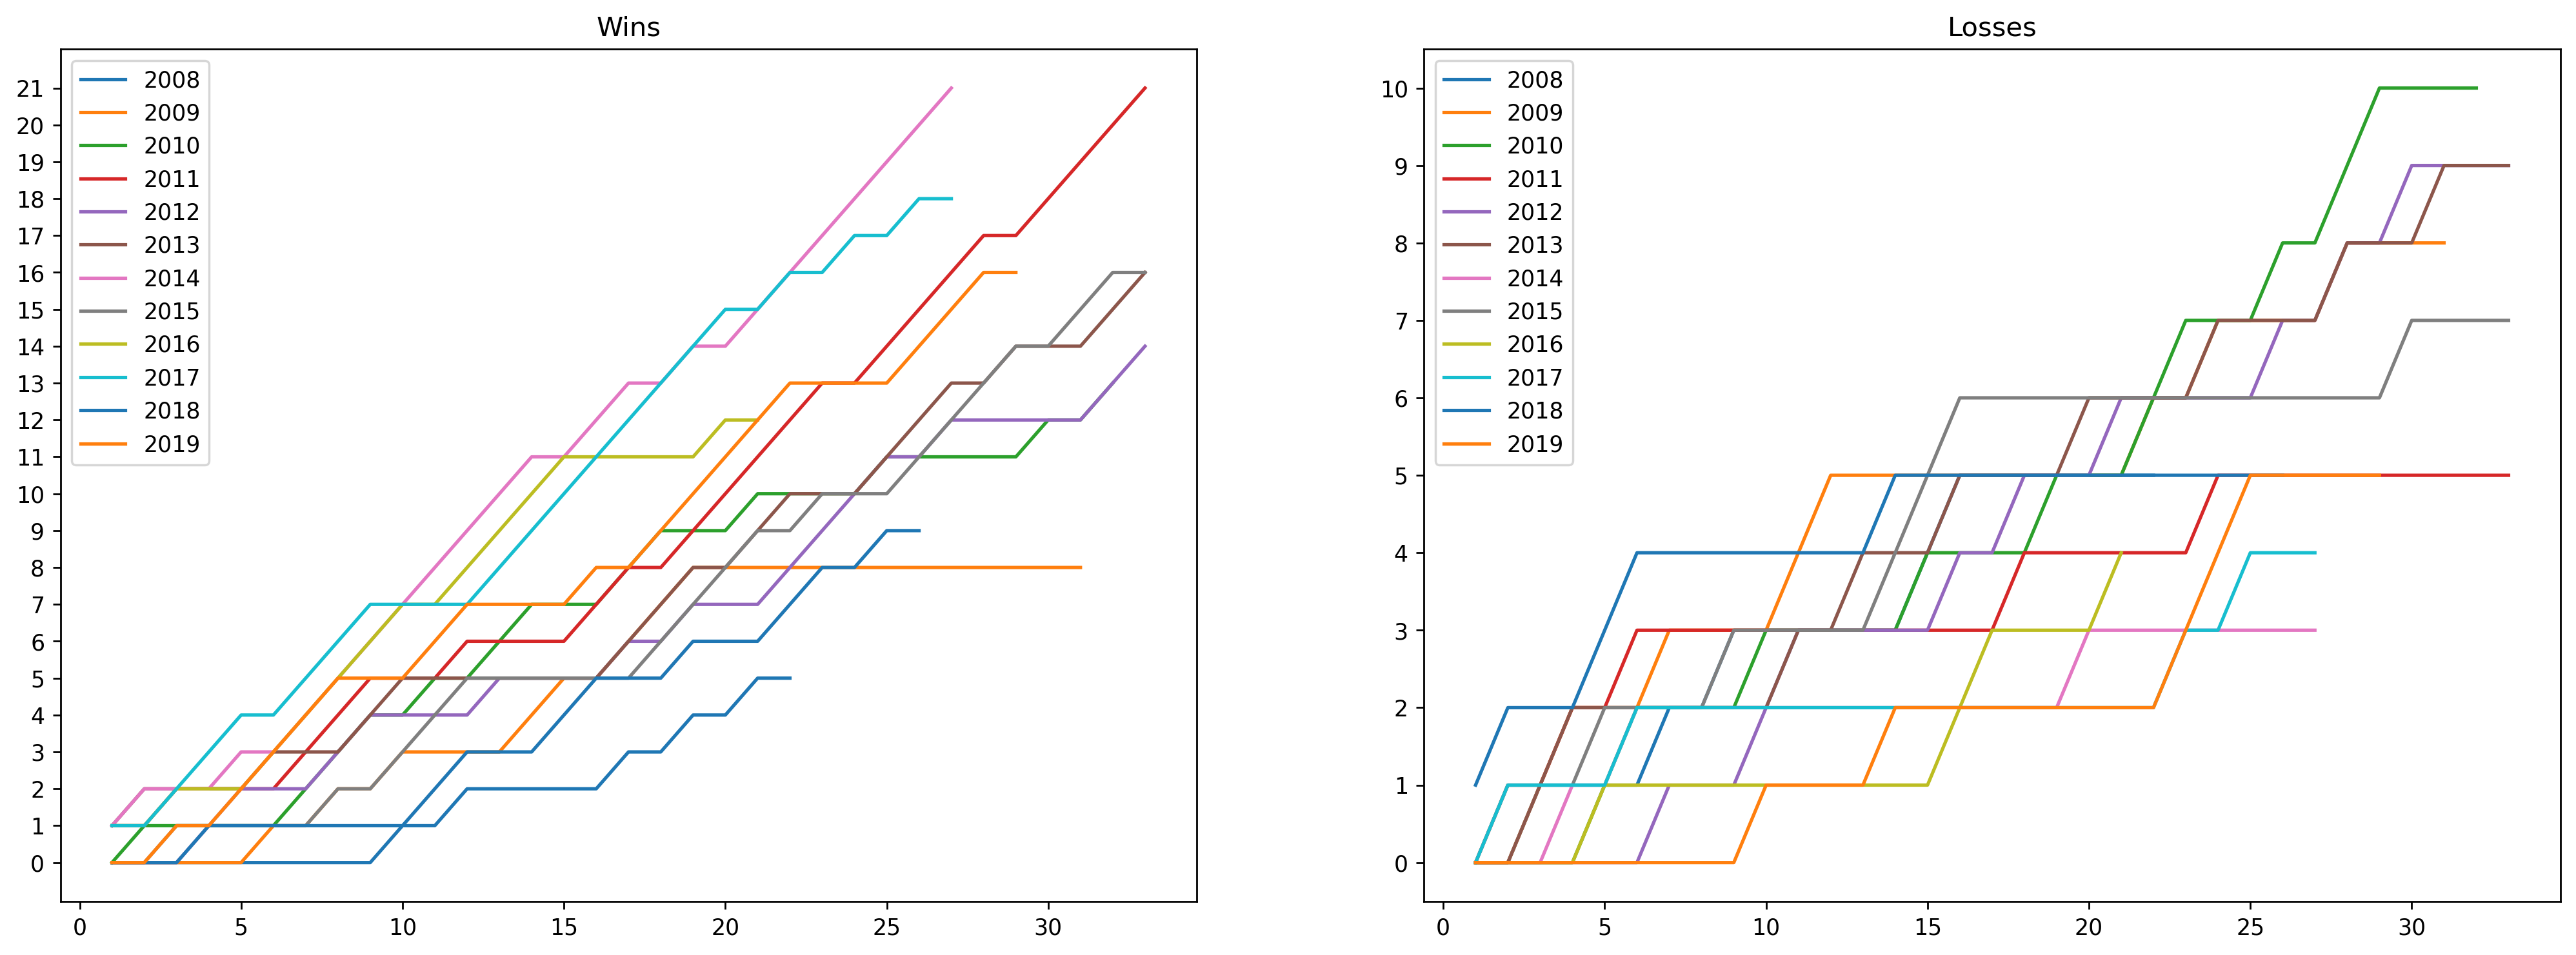

In [58]:
wins = []
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 7)
fig.dpi = 250
for log, year in zip(logs, years):
    games = np.asarray(log['Rk'].astype(int))
    axs[0].plot(games, getWins(log), label=year)
    axs[1].plot(games, getLosses(log), label=year)
axs[0].set_title("Wins")
axs[1].set_title("Losses")
axs[0].legend()
axs[1].legend()
plt.show()

In [59]:
k15 = bbr.getPlayerGameLog('kershcl01', 2015)
wins = getWins(k15)
loss = getLosses(k15)
games = np.asarray(k15['Gtm'].astype(int))

This plot simply shows Kershaw's wins and losses across the entire 2015 season.

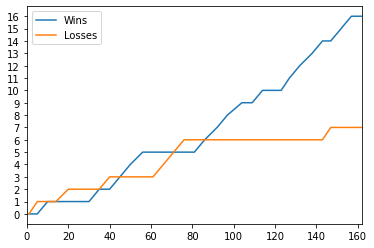

In [73]:
plt.plot(games, wins)
plt.plot(games, loss)
plt.xlim(0, 162)
plt.legend(("Wins", "Losses"))
plt.show()

In [61]:
k15

,Rk,Gcar,Gtm,Date,Tm,,Opp,Rslt,Inngs,Dec,...,3B,IBB,GDP,SF,ROE,aLI,WPA,RE24,Entered,Exited
0,1,212,1,Apr 6,LAD,,SDP,"W,6-3",GS-6,,...,0,0,0,0,0,1.04,-0.142,-0.36,1t start tie,6t 3 out d1
1,2,213,5,Apr 11,LAD,@,ARI,"L,0-6",GS-7,L(0-1),...,0,0,1,0,0,.83,-0.192,-2.84,1b start tie,7b --- 1 out d6
2,3,214,10,Apr 17,LAD,,COL,"W,7-3",GS-6,W(1-1),...,0,0,0,0,1,.99,-0.004,-0.36,1t start tie,6t 3 out a3
3,4,215,14,Apr 22,LAD,@,SFG,"L,2-3",GS-6,,...,0,0,0,0,0,.77,-0.009,0.76,1b start tie,6b 3 out d2
4,5,216,20,Apr 28,LAD,,SFG,"L,1-2",GS-7,L(1-2),...,0,0,1,0,0,.79,0.088,1.09,1t start tie,7t 3 out d1
5,6,217,25,May 4,LAD,@,MIL,"L,3-4",GS-8,,...,2,0,0,0,0,1.02,0.111,1.06,1b start a 1,8b -2- 1 out a1
6,7,218,30,May 10,LAD,@,COL,"W,9-5",GS-6,,...,0,1,0,0,0,1.44,-0.297,-2.52,1b start tie,6b 123 2 out tie
7,8,219,35,May 15,LAD,,COL,"W,6-4",GS-7,W(2-2),...,0,0,0,0,0,.67,0.197,1.68,1t start tie,7t 12- 2 out a5
8,9,220,40,May 21,LAD,@,SFG,"L,0-4",GS-8,L(2-3),...,0,0,1,0,0,.63,0.001,0.53,1b start tie,8b 1-3 1 out d2
9,10,221,45,May 26,LAD,,ATL,"W,8-0",GS-7,W(3-3),...,0,0,0,0,0,.43,0.220,3.09,1t start tie,7t 3 out a8


#### Simple plotting of Kershaw's wins by game number

In this part of the notebook, I decided to look at Kershaw's projected wins based on all of his past seasons. I plotted all of his career wins against the Game Number that he won them. I then used a simple Linear Model from sklearn to plot best fit lines for a simple win projection.

In [62]:
X = []
y = []
    
for log in logs:
    X_0, y_0 = getWinGames(log)
    X.extend(X_0)
    y.extend(y_0)

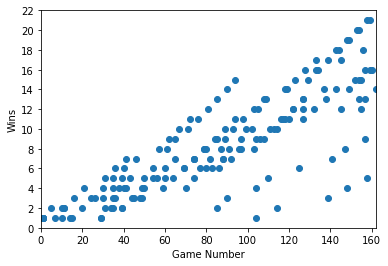

In [63]:
plt.scatter(X, y)
plt.xlim(0, 162)
plt.ylim(0, 22)
plt.yticks(range(0,23,2))
plt.xlabel('Game Number')
plt.ylabel('Wins')
plt.show()

Coefficients: 
 [0.08783943]
Mean squared error: 10.12
Coefficient of determination: 0.72


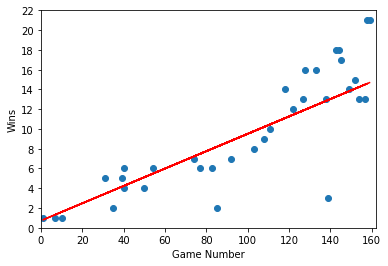

In [64]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = np.reshape(X, (-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred))

plt.scatter(X_test, y_test)
plt.plot(X_test, pred, c='r')
plt.xlim(0, 162)
plt.ylim(0, 22)
plt.yticks(range(0,23,2))
plt.xlabel('Game Number')
plt.ylabel('Wins')
plt.show()

Coefficients: 
 [0.08783943]
Mean squared error: 9.50
Coefficient of determination: 0.73


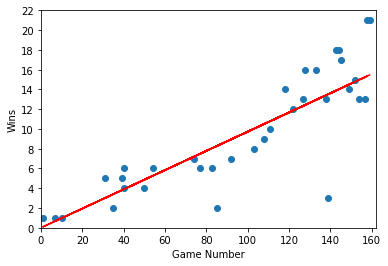

In [65]:
sgd = linear_model.SGDRegressor(loss='huber', epsilon=5, eta0=0.00001)
results = sgd.fit(X_train, y_train)
pred = sgd.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred))

plt.scatter(X_test, y_test)
plt.plot(X_test, pred, c='r')
plt.xlim(0, 162)
plt.ylim(0, 22)
plt.yticks(range(0,23,2))
plt.xlabel('Game Number')
plt.ylabel('Wins')
plt.show()

These next cells are work in progress. I plan to look at more outside effects on Kershaw's win projection, taking into account his opponent and time of the year. I also want to do some time series analysis on his wins to get a better projection than simply using a linear model.

In [66]:
opp = []
for log in logs:
    opp.extend(np.asarray(log['Opp'].astype(str)))
np.unique(opp)

array(['ARI', 'ATL', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA',
       'HOU', 'KCR', 'LAA', 'MIA', 'MIL', 'NYM', 'NYY', 'OAK', 'PHI',
       'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBR', 'TEX', 'TOR', 'WSN'],
      dtype='<U3')

In [67]:
import datetime as dt

dates = np.asarray(k15['Date'].astype(str))
fixed_dates = []
for date in dates:
    date = date.replace(u"\xa0", " ")
    fixed_dates.append(date + " 2015")
dt.datetime.strptime(fixed_dates[0], "%b %d %Y").date()

datetime.date(2015, 4, 6)